## benchmarking on sushmita ROY's dataset


In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_sroy_gt, unnormalize
import scanpy as sc
from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
# '../../data/main/gene_embeddings.parquet')
MAXGENES = 5000
MAXCELLS = 1024
model = scPrint.load_from_checkpoint(
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None, )#organisms=['NCBITaxon:9606','NCBITaxon:10090'])
# ../data/temp/o2uniqsx/epoch=18-step=133000.ckpt
metrics = {}


[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpot_exk3h
[d3graph] INFO> Writing /local/scratch/tmp/tmpot_exk3h/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
preprocessor = Preprocessor(is_symbol=True, force_preprocess=True, skip_validate=True,do_postp=False, min_valid_genes_id=MAXGENES, min_dataset_size=64)

In [4]:
model.organisms=['NCBITaxon:9606','NCBITaxon:10090']
# model.normalization = "sum" #log


# han / human

In [5]:
preadata = get_sroy_gt(get="han", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

Dropping layers:  KeysView(Layers with keys: )
checking raw counts
removed 0 non primary cells, 5520 renamining


filtered out 0 cells, 5520 renamining


Removed 0 genes.


startin QC


Seeing 151 outliers (2.74% of total dataset):
done


(GRnnData object with n_obs × n_vars = 5520 × 7465
     obs: 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 8463 elements,
 31)

In [6]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     genes=adata.var[adata.var.symbol.isin(preadata.var[preadata.grn.sum(1) != 0].index.tolist())].index.tolist(),
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=MAXCELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])

number of expressed genes in this cell type: 7295



  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:04<02:16,  4.41s/it]


  6%|▋         | 2/32 [00:06<01:37,  3.25s/it]


  9%|▉         | 3/32 [00:11<01:55,  3.98s/it]


 12%|█▎        | 4/32 [00:13<01:31,  3.27s/it]


 16%|█▌        | 5/32 [00:16<01:17,  2.88s/it]


 19%|█▉        | 6/32 [00:18<01:10,  2.71s/it]


 22%|██▏       | 7/32 [00:20<01:02,  2.50s/it]


 25%|██▌       | 8/32 [00:22<00:56,  2.37s/it]


 28%|██▊       | 9/32 [00:24<00:52,  2.26s/it]


 31%|███▏      | 10/32 [00:26<00:47,  2.18s/it]


 34%|███▍      | 11/32 [00:28<00:44,  2.12s/it]


 38%|███▊      | 12/32 [00:30<00:41,  2.09s/it]


 41%|████      | 13/32 [00:34<00:48,  2.58s/it]


 44%|████▍     | 14/32 [00:39<00:58,  3.25s/it]


 47%|████▋     | 15/32 [00:43<00:59,  3.52s/it]


 50%|█████     | 16/32 [00:45<00:49,  3.07s/it]


 53%|█████▎    | 17/32 [00:47<00:41,  2.76s/it]


 56%|█████▋    | 18/32 [00:49<00:35,  2.54s/it]


 59%|█████▉    | 19/32 [00:51<00:30,  2.38s/it]


 62%|██████▎   | 20/32 [00:53<00:27,  2.27s/it]


 66%|██████▌   | 21/32 [00:55<00:24,  2.20s/it]


 69%|██████▉   | 22/32 [00:57<00:21,  2.14s/it]


 72%|███████▏  | 23/32 [00:59<00:18,  2.10s/it]


 75%|███████▌  | 24/32 [01:01<00:16,  2.06s/it]


 78%|███████▊  | 25/32 [01:03<00:14,  2.03s/it]


 81%|████████▏ | 26/32 [01:05<00:12,  2.02s/it]


 84%|████████▍ | 27/32 [01:07<00:10,  2.00s/it]


 88%|████████▊ | 28/32 [01:09<00:08,  2.04s/it]


 91%|█████████ | 29/32 [01:11<00:06,  2.03s/it]


 94%|█████████▍| 30/32 [01:13<00:04,  2.03s/it]


 97%|█████████▋| 31/32 [01:15<00:02,  2.03s/it]


100%|██████████| 32/32 [01:17<00:00,  2.03s/it]


100%|██████████| 32/32 [01:17<00:00,  2.43s/it]

In [7]:
grn.varp["all"] = grn.varp['GRN']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']

precision:  0.038948387096774194 
recall:  1.0 
random precision: 0.03895617833244068



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2237.13it/s]

Area Under Precision-Recall Curve (AUPRC):  0.06843434798328386
EPR: 3.0202397291167022


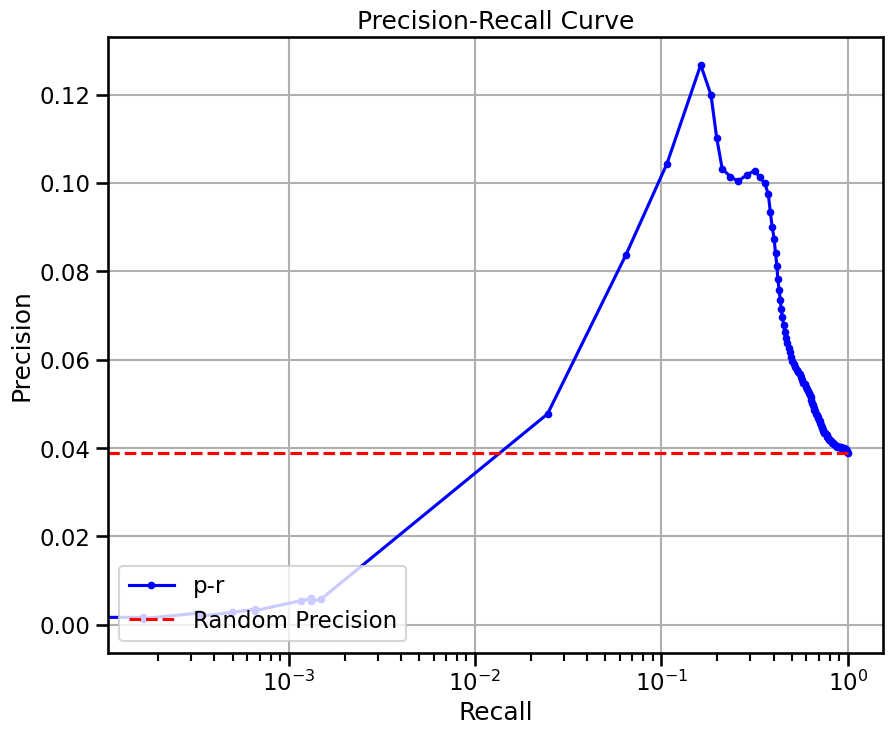

In [8]:
grn.varp['GRN'] = grn.varp['all'].mean(-1).T
metrics['scprint_mean_han_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

base enrichment


Top central genes: []


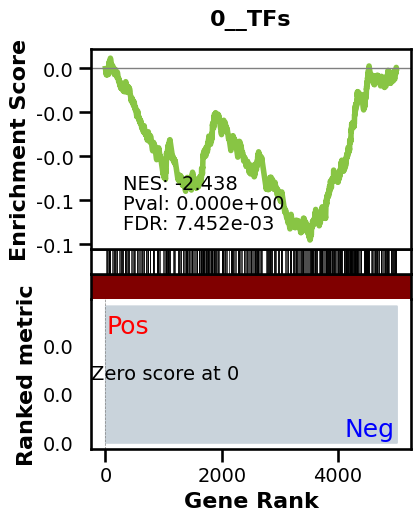

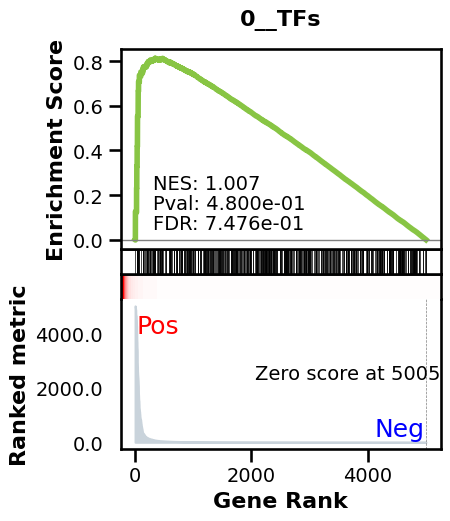

_________________________________________
TF specific enrichment


found some significant results for  16.363636363636363 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3767 genes
intersection pct: 0.7524970035956852
precision:  0.0016151890916386552 
recall:  1.0 
random precision: 0.001615617978811156



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.52it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.42it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.38it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.34it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.32it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.29it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.29it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.21it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.19it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.21it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.14it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.16it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.19it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.24it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.28it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.28it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.29it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.23it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.25it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.27it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.28it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.29it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.30it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.31it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.23it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.24it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017760927811393593


EPR: 2.5238206124897586


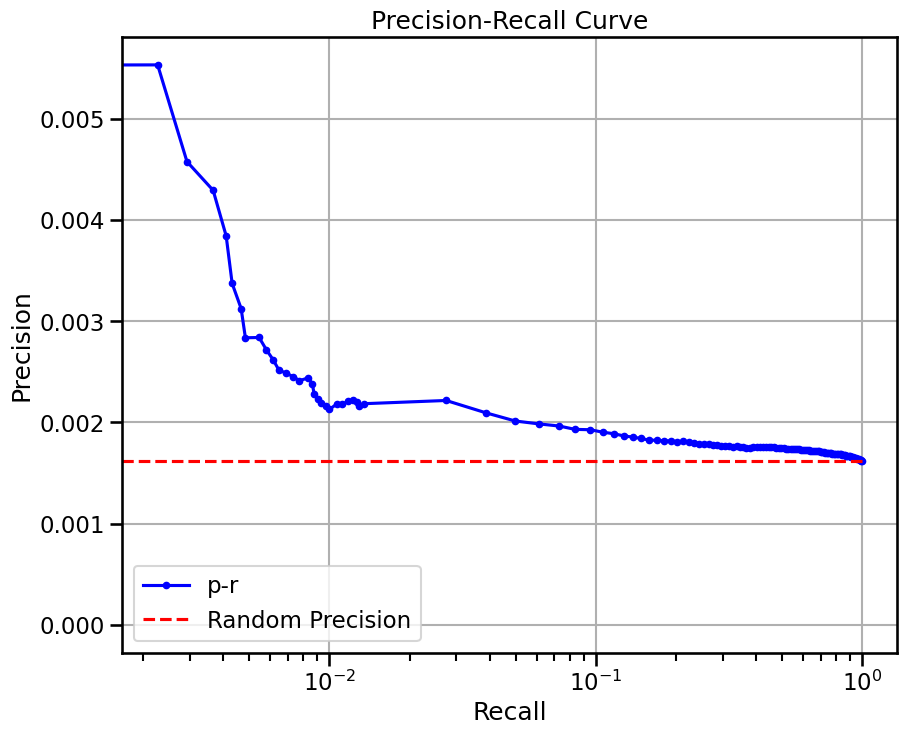

In [9]:
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scprint_mean_han_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

precision:  0.264192 
recall:  1.0 
random precision: 0.26424484896979394



  0%|          | 0/128 [00:00<?, ?it/s]


 39%|███▉      | 50/128 [00:00<00:00, 491.97it/s]


 78%|███████▊  | 100/128 [00:00<00:00, 487.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 486.17it/s]

Area Under Precision-Recall Curve (AUPRC):  0.28839491920674104
EPR: 1.1085181981375822


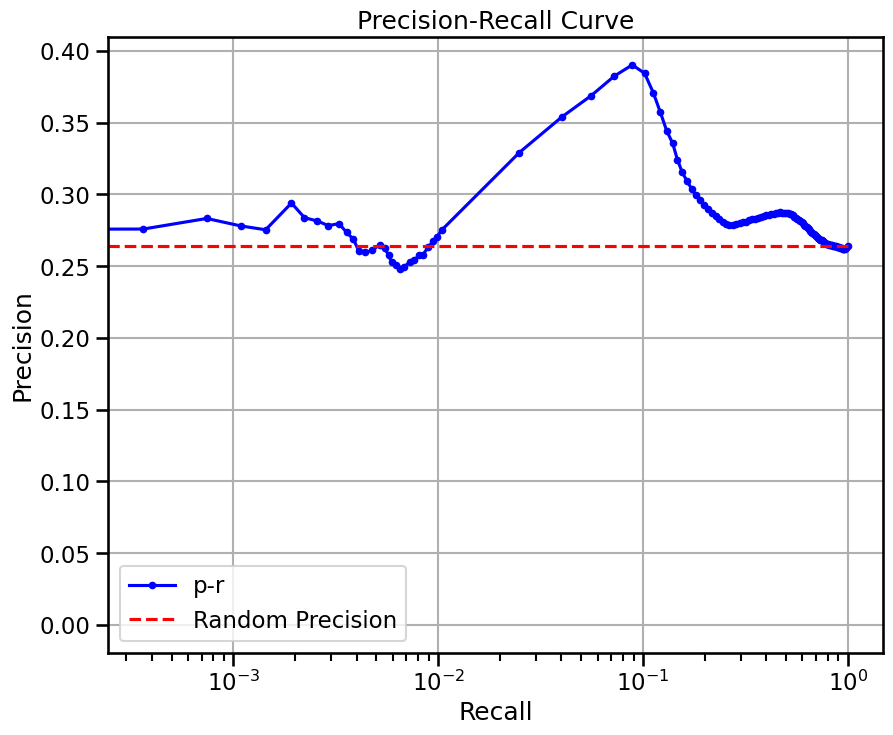

In [10]:
preadata = get_sroy_gt(get="han", species="human", gt="chip")
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scprint_mean_han_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.08270819672131148 
recall:  1.0 
random precision: 0.0827247416696454



  0%|          | 0/128 [00:00<?, ?it/s]


 33%|███▎      | 42/128 [00:00<00:00, 413.88it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 414.69it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 413.60it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 412.94it/s]

Area Under Precision-Recall Curve (AUPRC):  0.09725005285864109
EPR: 2.014218752208892


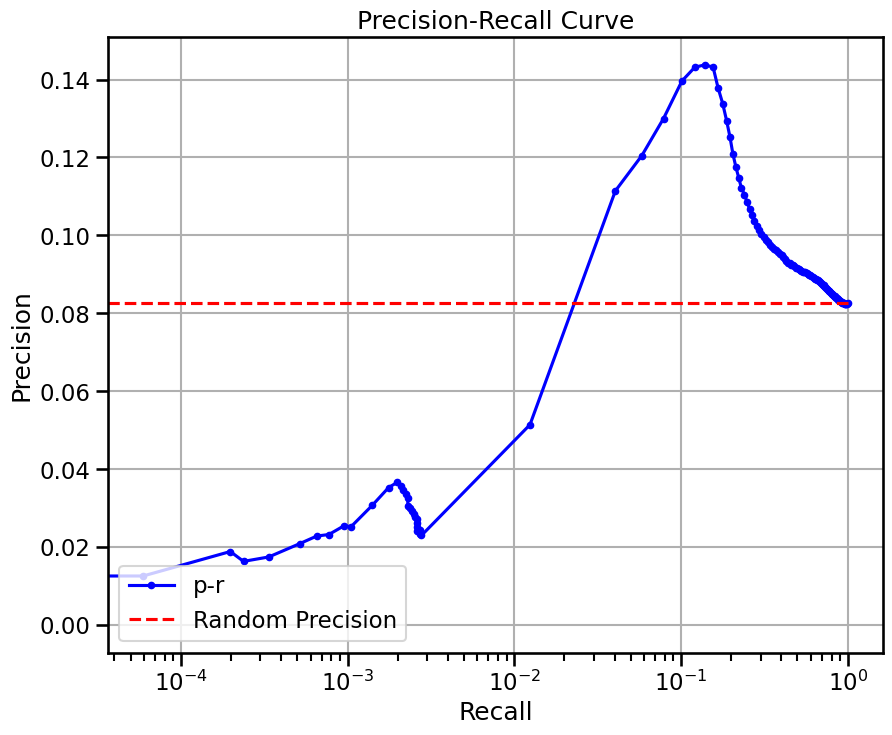

In [11]:
preadata = get_sroy_gt(get="han", species="human", gt="ko")
metrics['scprint_mean_han_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [12]:
preadata = get_sroy_gt(get="han", species="human", gt="full")

true elem 22920 ...


doing classification....


metrics {'used_heads': 3, 'precision': 0.00165958553348804, 'random_precision': 0.00165958553348804, 'recall': 1.0, 'predicted_true': 1419029.0, 'number_of_true': 2355.0}


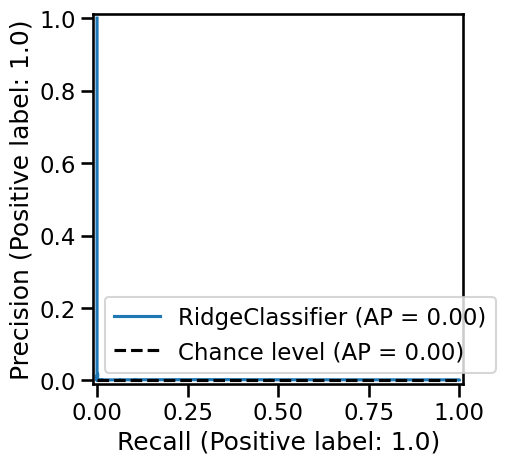

In [13]:
grn.varp["GRN"] = grn.varp['all']
_, m, clf_omni = train_classifier(grn, C=1, train_size=0.9, class_weight={1: 100, 0: 1}, shuffle=True, return_full=False)

In [14]:
# Save the clf_omni classifier to a file
joblib.dump(clf_omni, 'clf_omni_model.pkl')

['clf_omni_model.pkl']

precision:  0.038948387096774194 
recall:  1.0 
random precision: 0.03895617833244068



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2281.10it/s]

Area Under Precision-Recall Curve (AUPRC):  0.05200130779678841
EPR: 1.7114910163771409


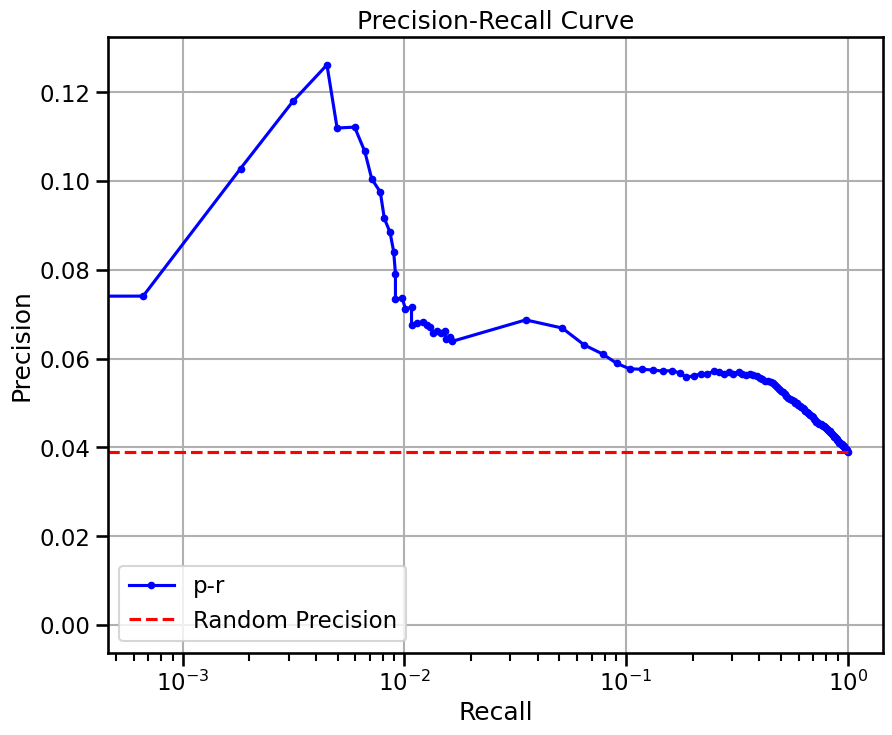

In [15]:
grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1).T
metrics['scprint_omni_han_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

base enrichment


Top central genes: []


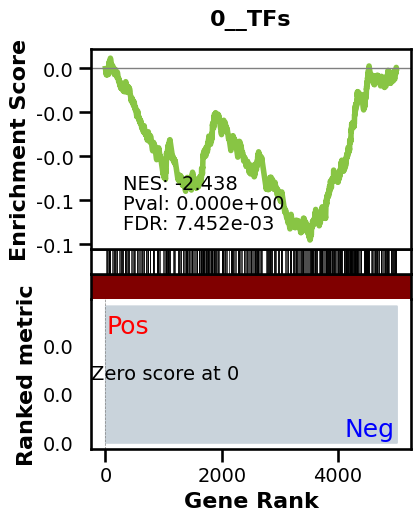

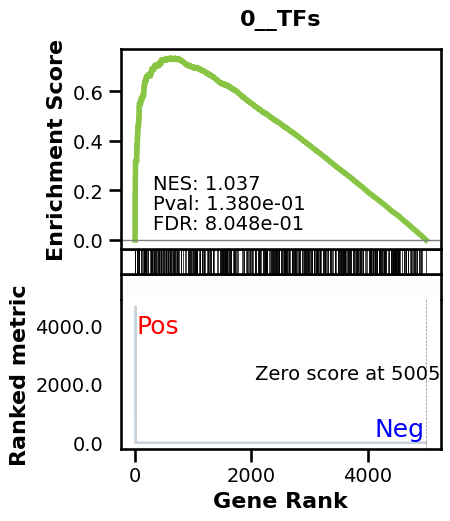

_________________________________________
TF specific enrichment


found some significant results for  20.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3767 genes
intersection pct: 0.7524970035956852
precision:  0.0016151890916386552 
recall:  1.0 
random precision: 0.001615617978811156



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 45.84it/s]


  8%|▊         | 10/128 [00:00<00:02, 45.77it/s]


 12%|█▏        | 15/128 [00:00<00:02, 45.62it/s]


 16%|█▌        | 20/128 [00:00<00:02, 45.61it/s]


 20%|█▉        | 25/128 [00:00<00:02, 45.62it/s]


 23%|██▎       | 30/128 [00:00<00:02, 45.62it/s]


 27%|██▋       | 35/128 [00:00<00:02, 45.63it/s]


 31%|███▏      | 40/128 [00:00<00:01, 45.64it/s]


 35%|███▌      | 45/128 [00:00<00:01, 45.66it/s]


 39%|███▉      | 50/128 [00:01<00:01, 45.49it/s]


 43%|████▎     | 55/128 [00:01<00:01, 45.52it/s]


 47%|████▋     | 60/128 [00:01<00:01, 45.61it/s]


 51%|█████     | 65/128 [00:01<00:01, 45.68it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 45.65it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 45.67it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 45.69it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 45.56it/s]


 70%|███████   | 90/128 [00:01<00:00, 45.53it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 45.59it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 45.60it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 45.60it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 45.61it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 45.62it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 45.60it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 45.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 45.60it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0020762777234566787
EPR: 2.387084644720966


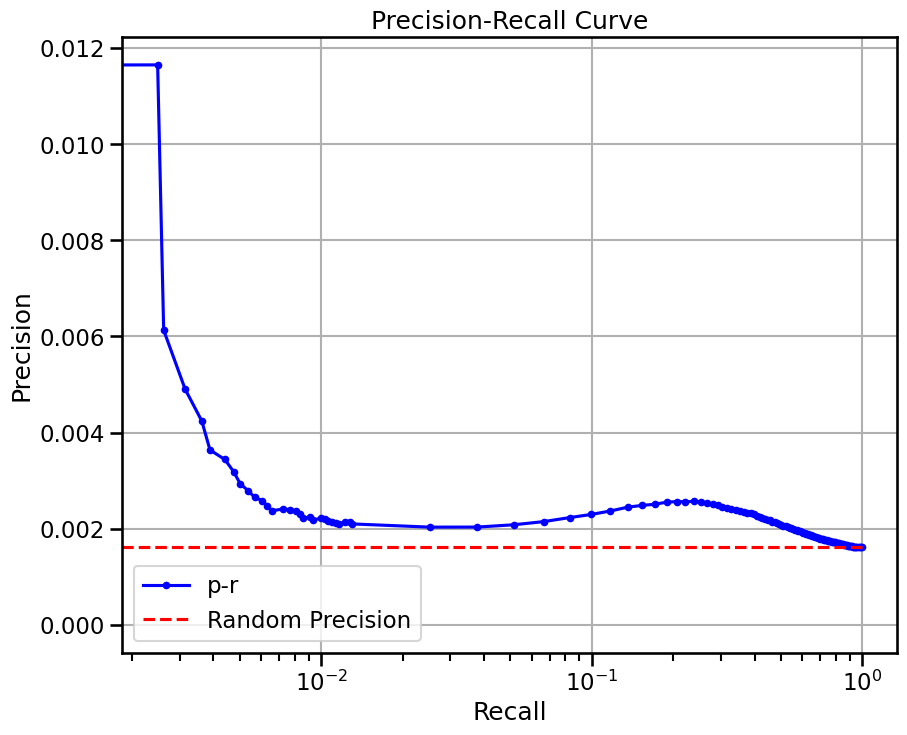

In [16]:
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scprint_omni_han_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

precision:  0.264192 
recall:  1.0 
random precision: 0.26424484896979394



  0%|          | 0/128 [00:00<?, ?it/s]


 38%|███▊      | 48/128 [00:00<00:00, 474.46it/s]


 75%|███████▌  | 96/128 [00:00<00:00, 474.10it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 473.58it/s]

Area Under Precision-Recall Curve (AUPRC):  0.22210443969649693
EPR: 0.6930884652990261


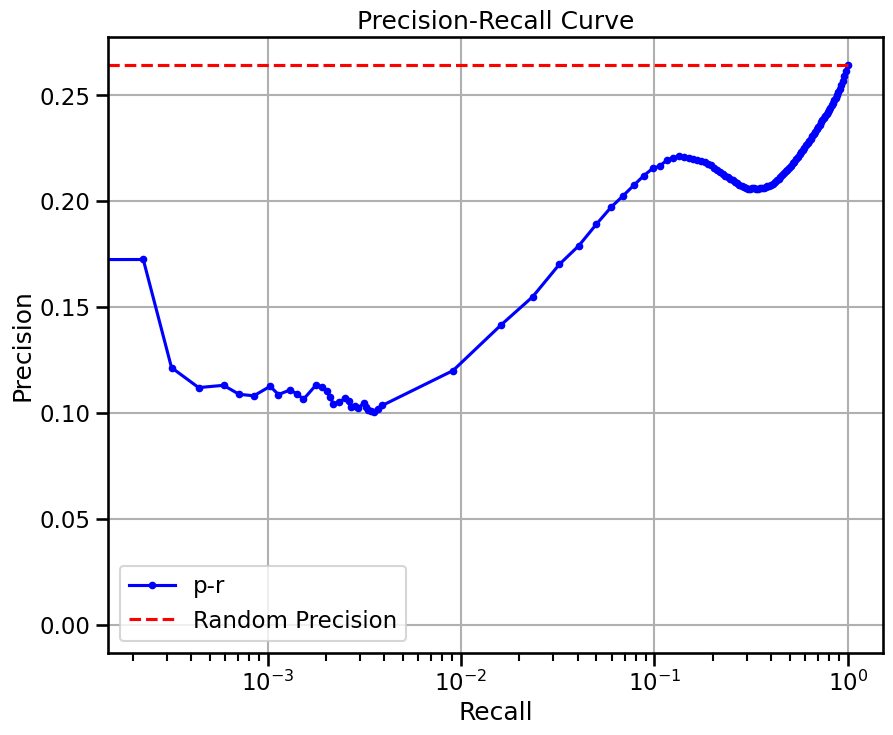

In [17]:
preadata = get_sroy_gt(get="han", species="human", gt="chip")
metrics['scprint_omni_han_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.08270819672131148 
recall:  1.0 
random precision: 0.0827247416696454



  0%|          | 0/128 [00:00<?, ?it/s]


 31%|███▏      | 40/128 [00:00<00:00, 398.30it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 397.89it/s]


 94%|█████████▍| 120/128 [00:00<00:00, 397.82it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 397.08it/s]

Area Under Precision-Recall Curve (AUPRC):  0.1149190035302769
EPR: 2.288506611239752


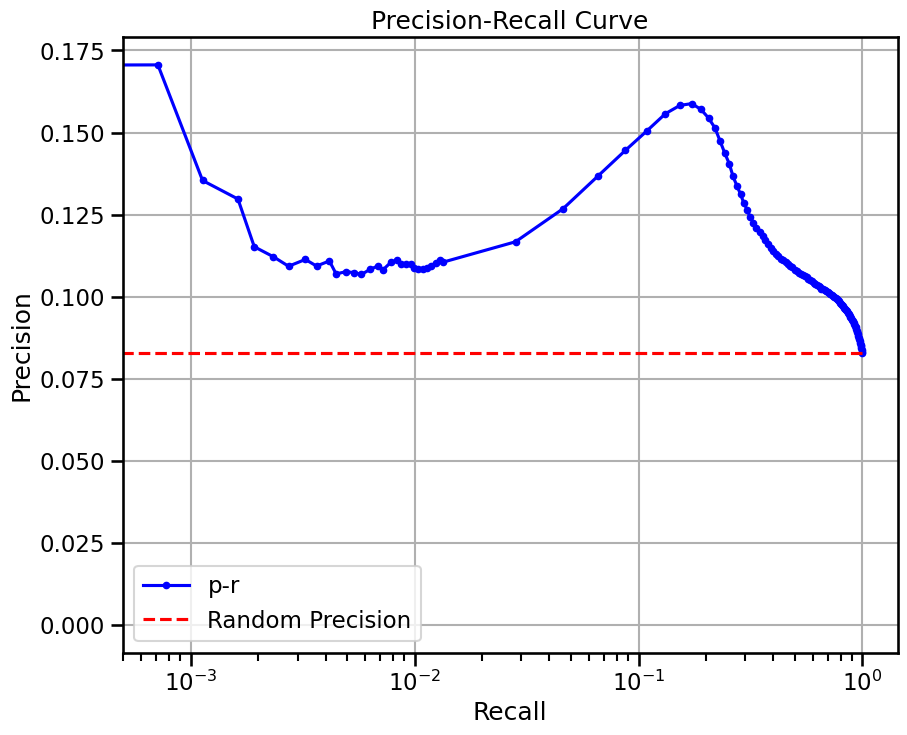

In [18]:
preadata = get_sroy_gt(get="han", species="human", gt="ko")
metrics['scprint_omni_han_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

pred shape (122, 5000, 128)
true elem 50452 ...
doing classification....


metrics {'used_heads': 41, 'precision': 0.08208196721311475, 'random_precision': 0.08208196721311475, 'recall': 1.0, 'predicted_true': 305000.0, 'number_of_true': 25035.0}


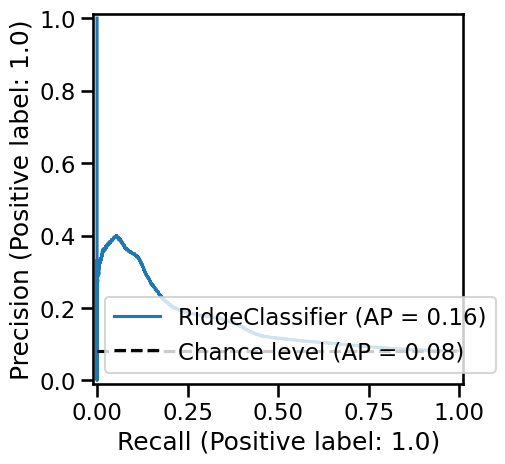

precision:  0.08270819672131148 
recall:  1.0 
random precision: 0.0827247416696454



  0%|          | 0/128 [00:00<?, ?it/s]


 33%|███▎      | 42/128 [00:00<00:00, 415.09it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 414.46it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 414.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 413.49it/s]

Area Under Precision-Recall Curve (AUPRC):  0.1667377873037742
EPR: 3.280664906818866


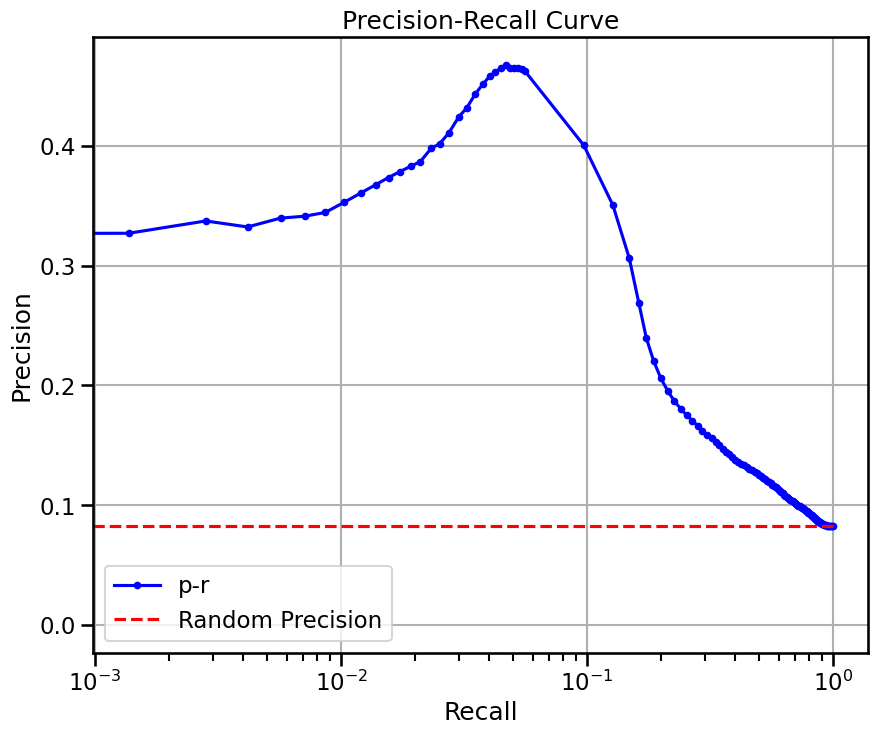

In [19]:
grn.varp['GRN'] = np.transpose(grn.varp['all'], (1,0,2))
weight = int((preadata.grn.sum(1)>0).sum()* (preadata.grn.sum(0)>0).sum()/ preadata.grn.sum().sum())
_, m, clf_self = train_classifier(
    grn, other=preadata, C=0.5, train_size=0.5, class_weight={1: weight, 0: 1}, shuffle=True, max_iter=200,return_full=False
)
grn.varp['GRN'] = grn.varp['all'][:,:,clf_self.coef_[0] > 0].mean(-1).T
metrics['scprint_self_han_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [20]:
joblib.dump(clf_self, 'clf_self_model.pkl')

['clf_self_model.pkl']

base enrichment


Top central genes: []


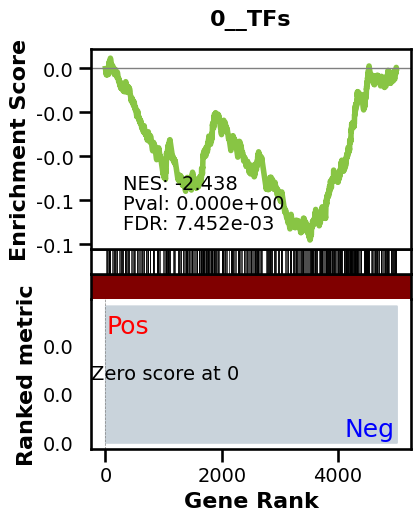

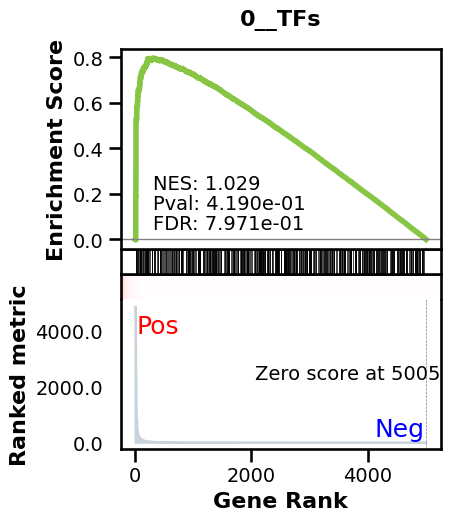

_________________________________________
TF specific enrichment


found some significant results for  14.545454545454545 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3767 genes
intersection pct: 0.7524970035956852
precision:  0.0016151890916386552 
recall:  1.0 
random precision: 0.001615617978811156



  0%|          | 0/128 [00:00<?, ?it/s]


  4%|▍         | 5/128 [00:00<00:02, 46.03it/s]


  8%|▊         | 10/128 [00:00<00:02, 46.04it/s]


 12%|█▏        | 15/128 [00:00<00:02, 46.06it/s]


 16%|█▌        | 20/128 [00:00<00:02, 46.00it/s]


 20%|█▉        | 25/128 [00:00<00:02, 46.03it/s]


 23%|██▎       | 30/128 [00:00<00:02, 46.03it/s]


 27%|██▋       | 35/128 [00:00<00:02, 46.05it/s]


 31%|███▏      | 40/128 [00:00<00:01, 46.06it/s]


 35%|███▌      | 45/128 [00:00<00:01, 46.08it/s]


 39%|███▉      | 50/128 [00:01<00:01, 46.05it/s]


 43%|████▎     | 55/128 [00:01<00:01, 46.04it/s]


 47%|████▋     | 60/128 [00:01<00:01, 46.05it/s]


 51%|█████     | 65/128 [00:01<00:01, 46.07it/s]


 55%|█████▍    | 70/128 [00:01<00:01, 46.03it/s]


 59%|█████▊    | 75/128 [00:01<00:01, 46.03it/s]


 62%|██████▎   | 80/128 [00:01<00:01, 46.01it/s]


 66%|██████▋   | 85/128 [00:01<00:00, 46.03it/s]


 70%|███████   | 90/128 [00:01<00:00, 46.04it/s]


 74%|███████▍  | 95/128 [00:02<00:00, 46.05it/s]


 78%|███████▊  | 100/128 [00:02<00:00, 46.05it/s]


 82%|████████▏ | 105/128 [00:02<00:00, 46.08it/s]


 86%|████████▌ | 110/128 [00:02<00:00, 46.06it/s]


 90%|████████▉ | 115/128 [00:02<00:00, 46.05it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 46.06it/s]


 98%|█████████▊| 125/128 [00:02<00:00, 46.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 46.03it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017857381434205329


EPR: 2.5238206124897586


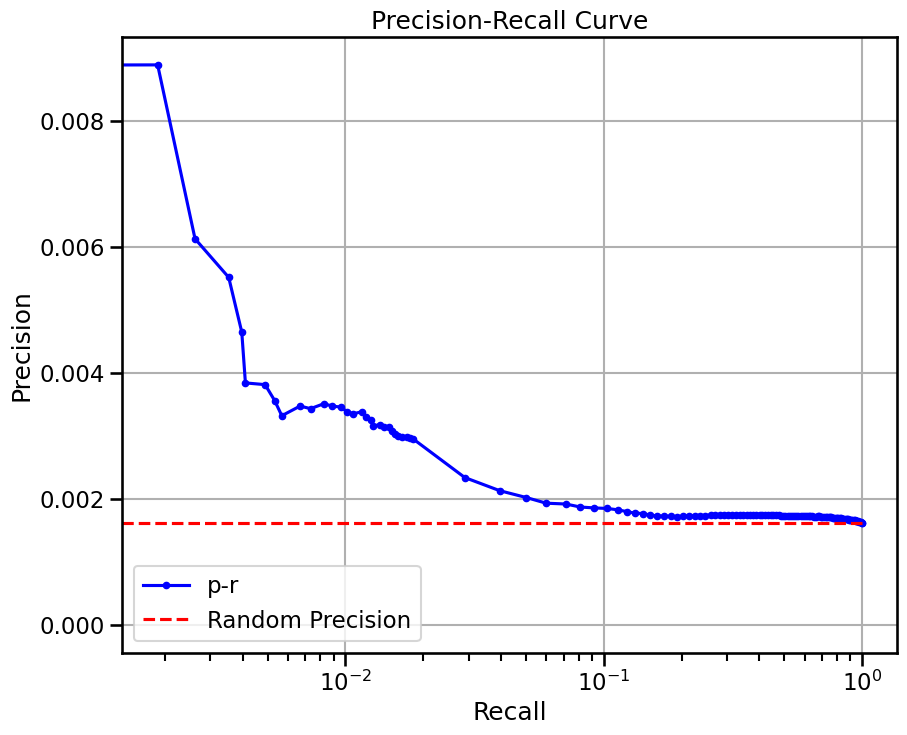

In [21]:
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scprint_self_han_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

precision:  0.264192 
recall:  1.0 
random precision: 0.26424484896979394



  0%|          | 0/128 [00:00<?, ?it/s]


 39%|███▉      | 50/128 [00:00<00:00, 492.32it/s]


 78%|███████▊  | 100/128 [00:00<00:00, 490.83it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 490.01it/s]

Area Under Precision-Recall Curve (AUPRC):  0.2710998769834623
EPR: 1.0125671917341756


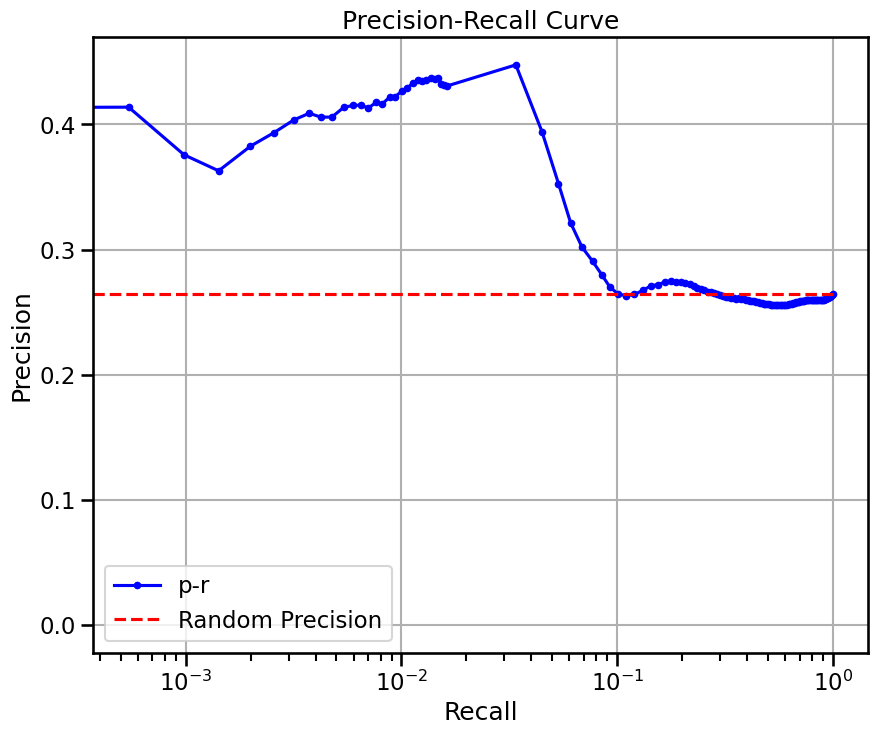

In [22]:
grn.varp['GRN'] = grn.varp['GRN'].T
preadata = get_sroy_gt(get="han", species="human", gt="chip")
metrics['scprint_self_han_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.08270819672131148 
recall:  1.0 
random precision: 0.0827247416696454



  0%|          | 0/128 [00:00<?, ?it/s]


 33%|███▎      | 42/128 [00:00<00:00, 415.10it/s]


 66%|██████▌   | 84/128 [00:00<00:00, 414.49it/s]


 98%|█████████▊| 126/128 [00:00<00:00, 413.81it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 412.87it/s]

Area Under Precision-Recall Curve (AUPRC):  0.1667377873037742
EPR: 3.280664906818866


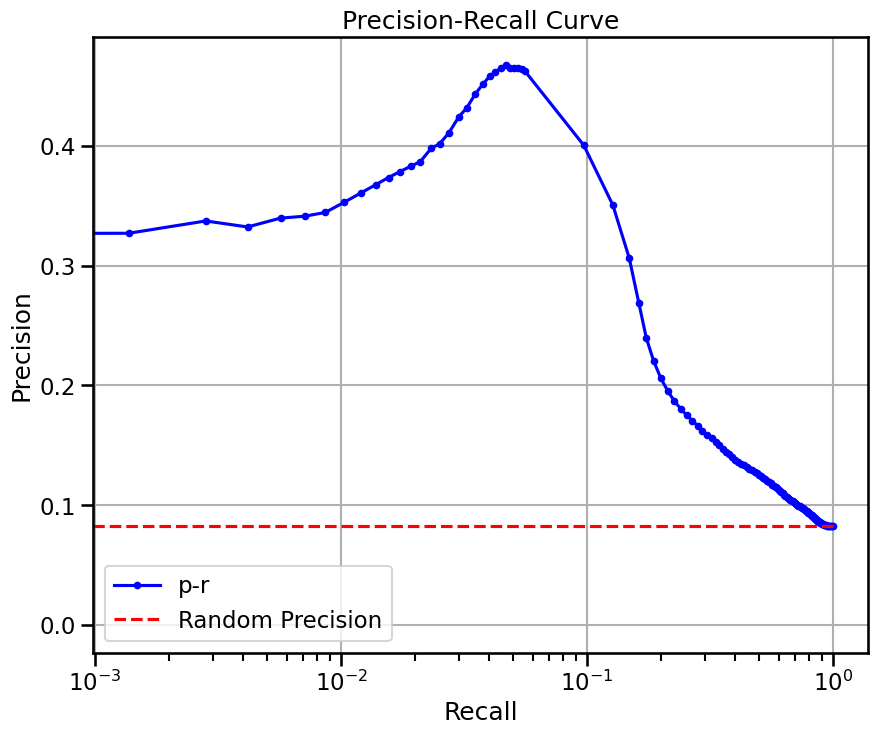

In [23]:
preadata = get_sroy_gt(get="han", species="human", gt="ko")
metrics['scprint_self_han_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [24]:
del grn

# mine / human

In [25]:
preadata = get_sroy_gt(get="mine", species="human", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

Dropping layers:  KeysView(Layers with keys: )
checking raw counts
Data is not raw counts, please check layers, find raw data, or bypass with force_preprocess
removed 0 non primary cells, 115 renamining


filtered out 0 cells, 115 renamining
Removed 0 genes.


startin QC
Seeing 105 outliers (91.30% of total dataset):


done


(GRnnData object with n_obs × n_vars = 115 × 28466
     obs: 'organism_ontology_term_id'
     var: 'ensembl_id'
     varp: 'GRN'
     with a grn of 11563 elements,
 35)

In [26]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     genes=adata.var[adata.var.symbol.isin(preadata.var[preadata.grn.sum(1) != 0].index.tolist())].index.tolist(),
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=MAXCELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])

number of expressed genes in this cell type: 23510



  0%|          | 0/4 [00:00<?, ?it/s]


 25%|██▌       | 1/4 [00:02<00:08,  2.99s/it]


 50%|█████     | 2/4 [00:04<00:04,  2.34s/it]


 75%|███████▌  | 3/4 [00:06<00:02,  2.14s/it]


100%|██████████| 4/4 [00:07<00:00,  1.75s/it]


100%|██████████| 4/4 [00:08<00:00,  2.03s/it]

In [27]:
grn.varp["all"] = grn.varp['GRN']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']

precision:  0.026910991300896372 
recall:  1.0 
random precision: 0.026917223582346324



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2788.88it/s]

Area Under Precision-Recall Curve (AUPRC):  0.022676030116136163
EPR: 0.03463239738979478


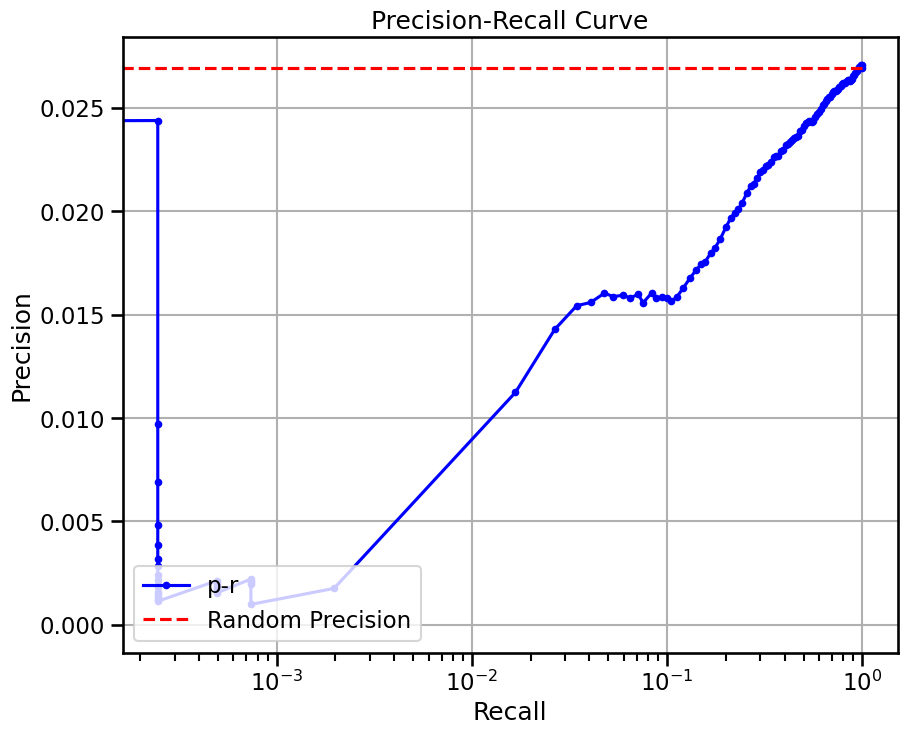

In [28]:
grn.varp['GRN'] = grn.varp['all'].mean(-1).T
metrics['scprint_mean_mine_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

base enrichment


Top central genes: []


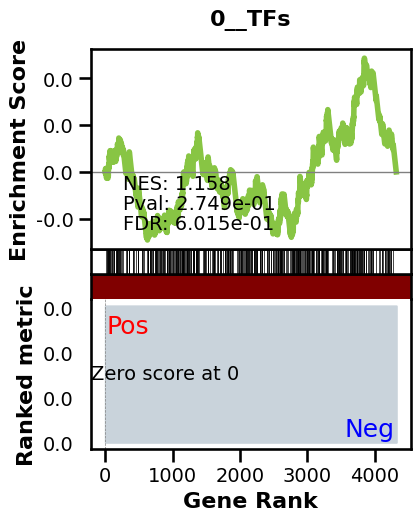

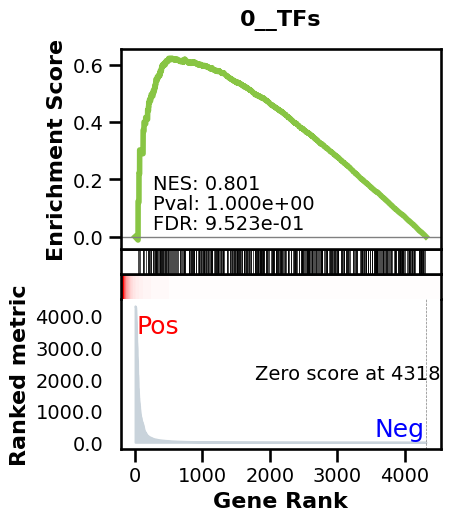

_________________________________________
TF specific enrichment


found some significant results for  15.555555555555555 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2839 genes
intersection pct: 0.6573280852049086
precision:  0.0016113061157795468 
recall:  1.0 
random precision: 0.0016118738769197087



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 85.02it/s]


 14%|█▍        | 18/128 [00:00<00:01, 84.92it/s]


 21%|██        | 27/128 [00:00<00:01, 85.01it/s]


 28%|██▊       | 36/128 [00:00<00:01, 85.00it/s]


 35%|███▌      | 45/128 [00:00<00:00, 84.98it/s]


 42%|████▏     | 54/128 [00:00<00:00, 84.96it/s]


 49%|████▉     | 63/128 [00:00<00:00, 84.84it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 84.87it/s]


 63%|██████▎   | 81/128 [00:00<00:00, 84.88it/s]


 70%|███████   | 90/128 [00:01<00:00, 84.91it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 84.92it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 84.86it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 84.86it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 84.90it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 84.83it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001820105519417525
EPR: 1.0031915422123843


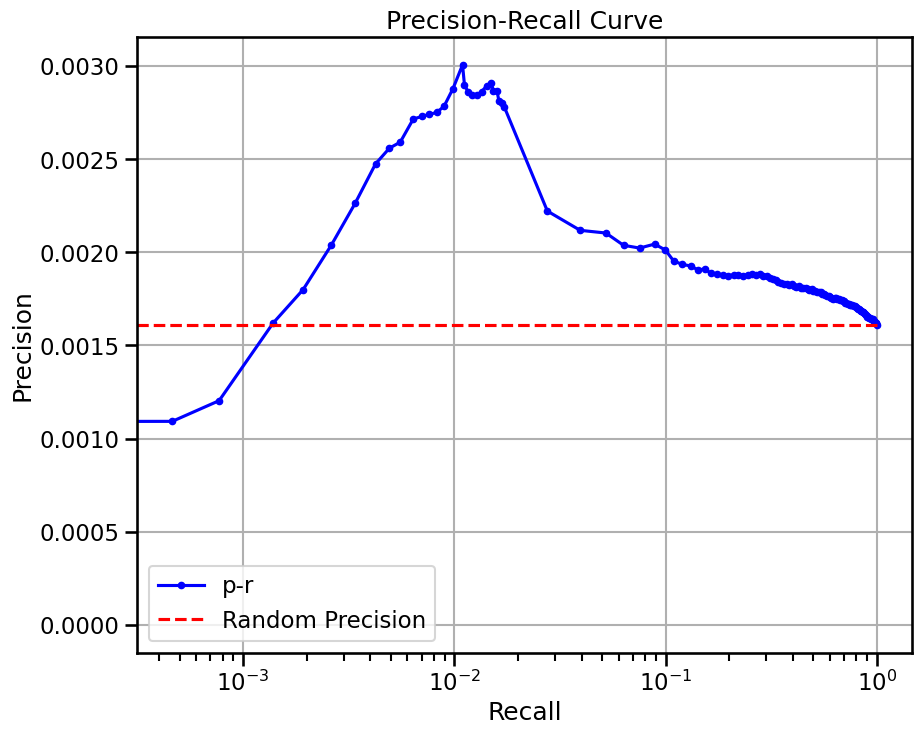

In [29]:
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scprint_mean_mine_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

precision:  0.026910991300896372 
recall:  1.0 
random precision: 0.026917223582346324



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2809.00it/s]

Area Under Precision-Recall Curve (AUPRC):  0.029587859461321996
EPR: 1.131103432655284


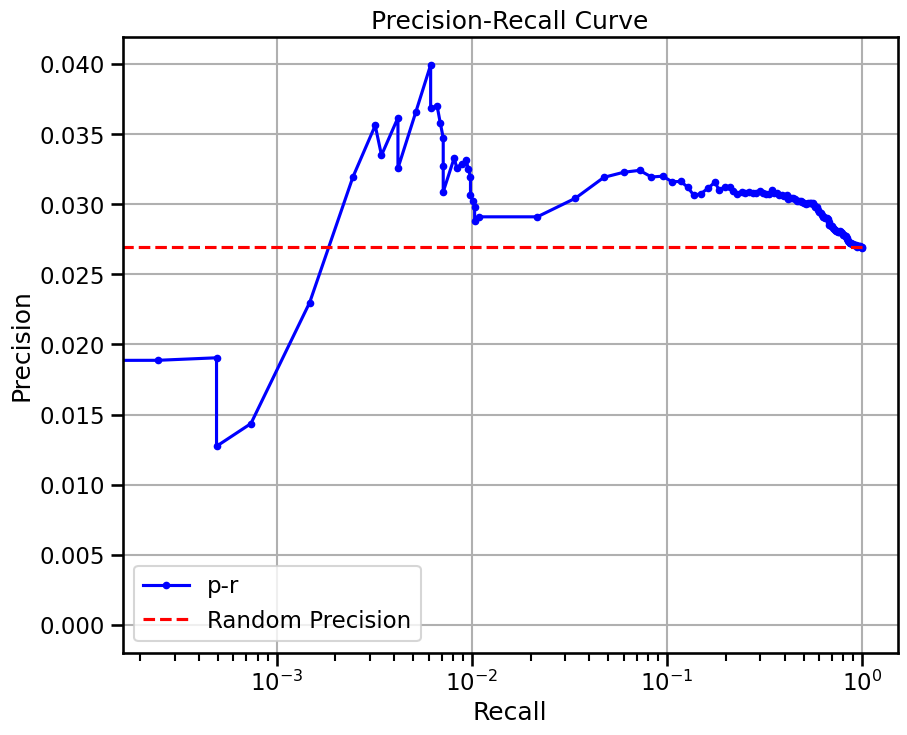

In [30]:
grn.varp["GRN"] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1).T
metrics['scprint_omni_mine_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

base enrichment


Top central genes: []


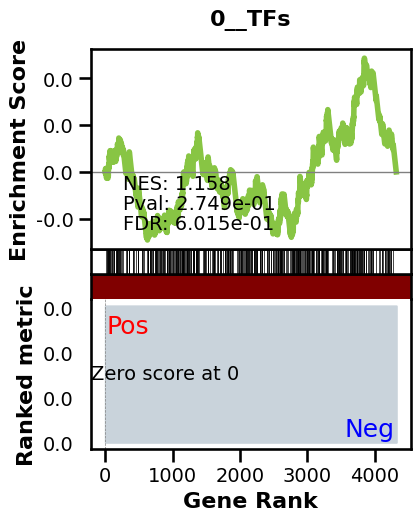

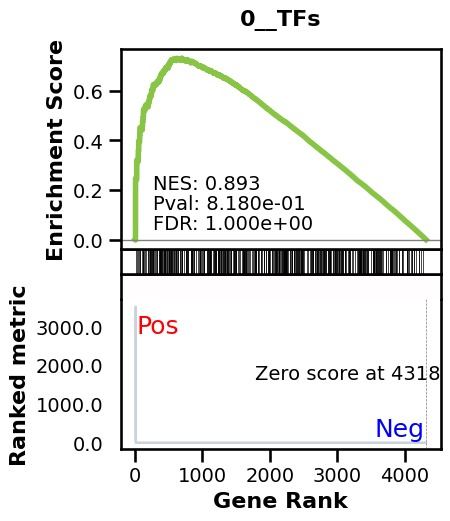

_________________________________________
TF specific enrichment


found some significant results for  31.11111111111111 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2839 genes
intersection pct: 0.6573280852049086
precision:  0.0016113061157795468 
recall:  1.0 
random precision: 0.0016118738769197087



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 85.74it/s]


 14%|█▍        | 18/128 [00:00<00:01, 85.71it/s]


 21%|██        | 27/128 [00:00<00:01, 85.66it/s]


 28%|██▊       | 36/128 [00:00<00:01, 85.71it/s]


 35%|███▌      | 45/128 [00:00<00:00, 85.71it/s]


 42%|████▏     | 54/128 [00:00<00:00, 85.77it/s]


 49%|████▉     | 63/128 [00:00<00:00, 85.77it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 85.77it/s]


 63%|██████▎   | 81/128 [00:00<00:00, 85.68it/s]


 70%|███████   | 90/128 [00:01<00:00, 85.27it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 85.38it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 85.48it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 85.59it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 85.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 85.56it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0019158163231083603
EPR: 2.5928273015236547


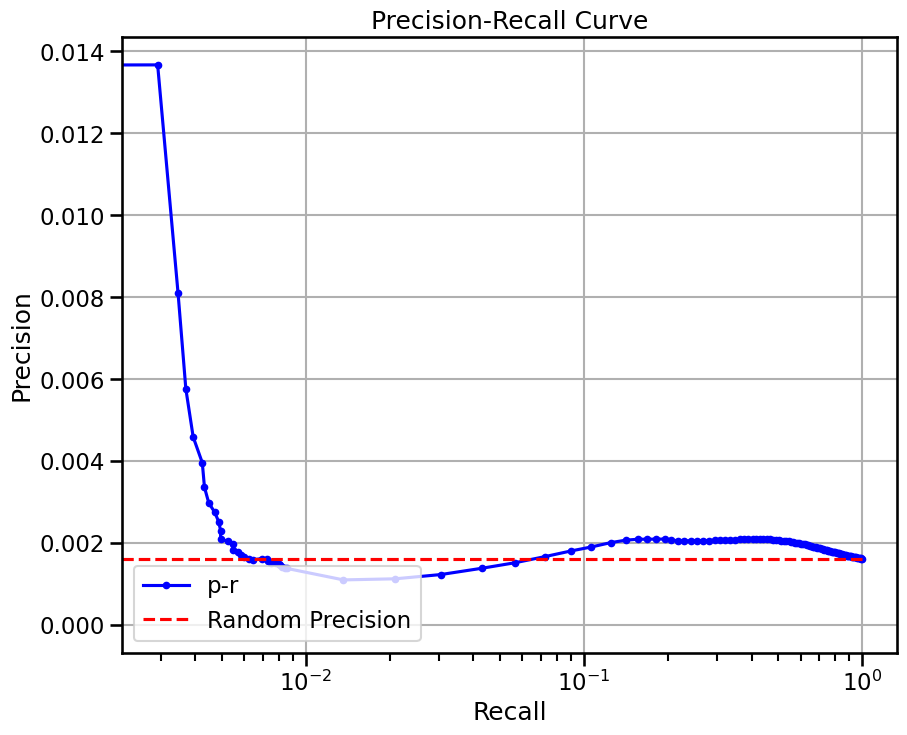

In [31]:
grn.varp["GRN"] = grn.varp["GRN"].T
metrics['scprint_omni_mine_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

precision:  0.026910991300896372 
recall:  1.0 
random precision: 0.026917223582346324



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2804.95it/s]

Area Under Precision-Recall Curve (AUPRC):  0.027049304698380457
EPR: 0.39771036895791034


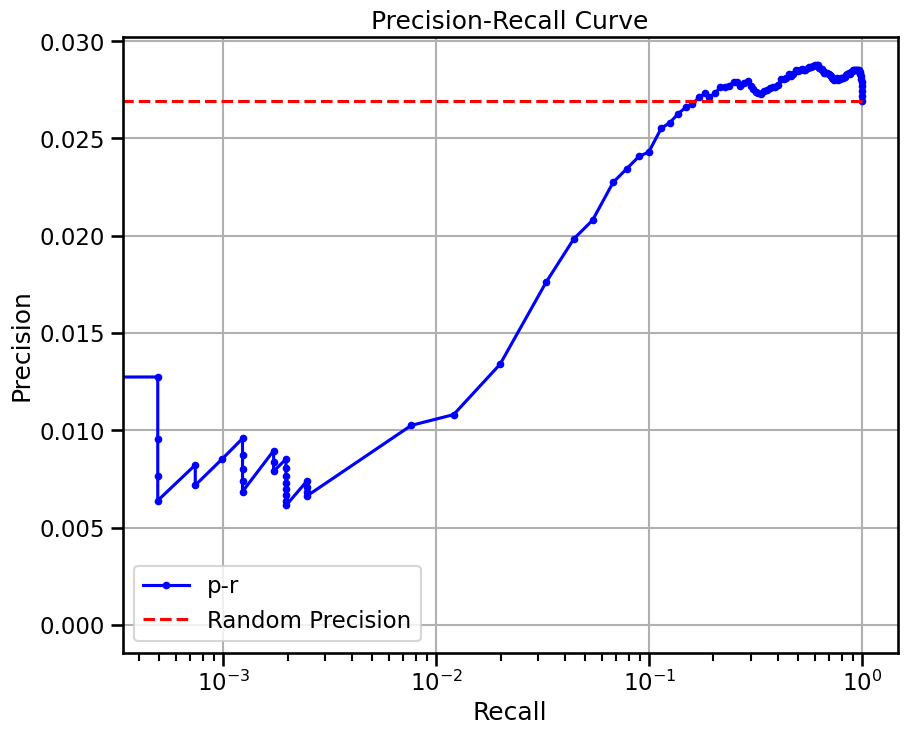

In [32]:
grn.varp["GRN"] = grn.varp['all'][:,:,clf_self.coef_[0] > 0].mean(-1).T
metrics['scprint_self_mine_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

base enrichment


Top central genes: []


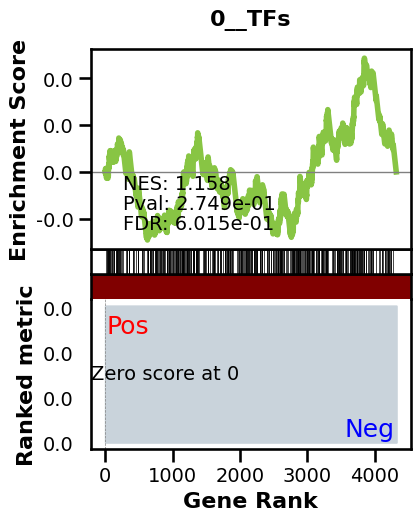

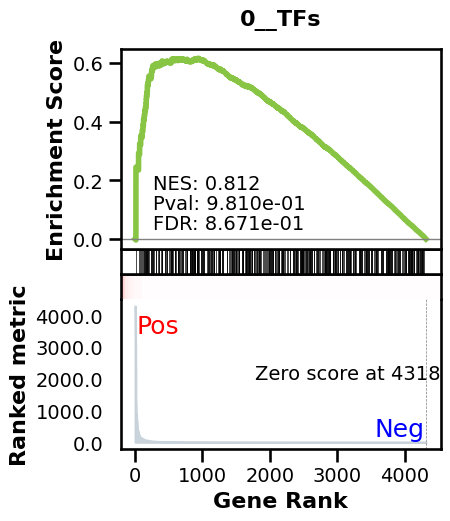

_________________________________________
TF specific enrichment


found some significant results for  13.333333333333334 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2839 genes
intersection pct: 0.6573280852049086
precision:  0.0016113061157795468 
recall:  1.0 
random precision: 0.0016118738769197087



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 85.10it/s]


 14%|█▍        | 18/128 [00:00<00:01, 85.35it/s]


 21%|██        | 27/128 [00:00<00:01, 85.36it/s]


 28%|██▊       | 36/128 [00:00<00:01, 85.27it/s]


 35%|███▌      | 45/128 [00:00<00:00, 85.37it/s]


 42%|████▏     | 54/128 [00:00<00:00, 85.44it/s]


 49%|████▉     | 63/128 [00:00<00:00, 85.50it/s]


 56%|█████▋    | 72/128 [00:00<00:00, 85.49it/s]


 63%|██████▎   | 81/128 [00:00<00:00, 85.30it/s]


 70%|███████   | 90/128 [00:01<00:00, 85.42it/s]


 77%|███████▋  | 99/128 [00:01<00:00, 85.44it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 85.44it/s]


 91%|█████████▏| 117/128 [00:01<00:00, 85.44it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 85.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 85.32it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001819205778754719
EPR: 2.6896904320649555


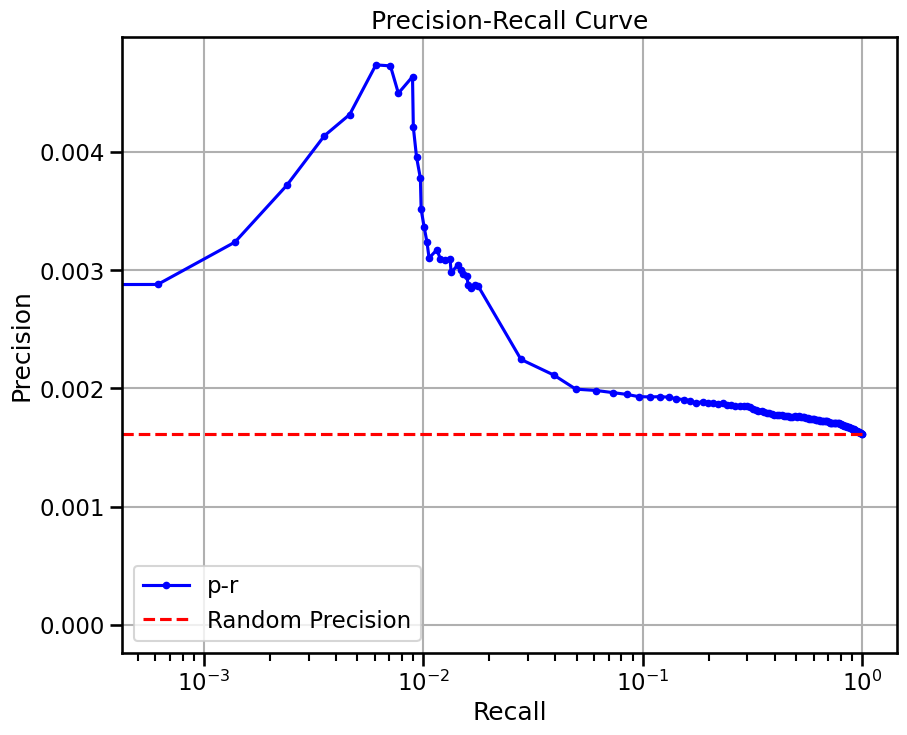

In [33]:
grn.varp['GRN'] = grn.varp['GRN'].T
metrics['scprint_self_mine_base'] = BenGRN(grn, do_auc=True, doplot=True).scprint_benchmark()

In [34]:
del grn

In [35]:
metrics

{'scprint_mean_han_full': {'precision': 0.038948387096774194,
  'recall': 1.0,
  'rand_precision': 0.03895617833244068,
  'auprc': 0.06843434798328386,
  'epr': 3.0202397291167022},
 'scprint_mean_han_base': {'TF_enr': True,
  'significant_enriched_TFtargets': 16.363636363636363,
  'precision': 0.0016151890916386552,
  'recall': 1.0,
  'rand_precision': 0.001615617978811156,
  'auprc': 0.0017760927811393593,
  'epr': 2.5238206124897586},
 'scprint_mean_han_chip': {'precision': 0.264192,
  'recall': 1.0,
  'rand_precision': 0.26424484896979394,
  'auprc': 0.28839491920674104,
  'epr': 1.1085181981375822},
 'scprint_mean_han_ko': {'precision': 0.08270819672131148,
  'recall': 1.0,
  'rand_precision': 0.0827247416696454,
  'auprc': 0.09725005285864109,
  'epr': 2.014218752208892},
 'scprint_omni_han_full': {'precision': 0.038948387096774194,
  'recall': 1.0,
  'rand_precision': 0.03895617833244068,
  'auprc': 0.05200130779678841,
  'epr': 1.7114910163771409},
 'scprint_omni_han_base': {'T

## tran / mouse

In [5]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

Dropping layers:  KeysView(Layers with keys: )
checking raw counts
removed 0 non primary cells, 2369 renamining
filtered out 0 cells, 2369 renamining
Removed 0 genes.
startin QC
Seeing 91 outliers (3.84% of total dataset):
done


(GRnnData object with n_obs × n_vars = 2369 × 6618
     obs: 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 7162 elements,
 31)

In [6]:
# Load the clf_omni classifier from the file
clf_omni = joblib.load('clf_omni_model.pkl')

In [7]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     genes=adata.var[adata.var.symbol.isin(preadata.var[preadata.grn.sum(1) != 0].index.tolist())].index.tolist(),
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=MAXCELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])

number of expressed genes in this cell type: 6435


RuntimeError: Currently, AutocastCPU only support Bfloat16 as the autocast_cpu_dtype

In [38]:
grn.varp["all"] = grn.varp['GRN']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']

precision:  0.04014336917562724 
recall:  1.0 
random precision: 0.04015140749544615



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2247.51it/s]

Area Under Precision-Recall Curve (AUPRC):  0.035926093835698544
EPR: 0.5445170756490373


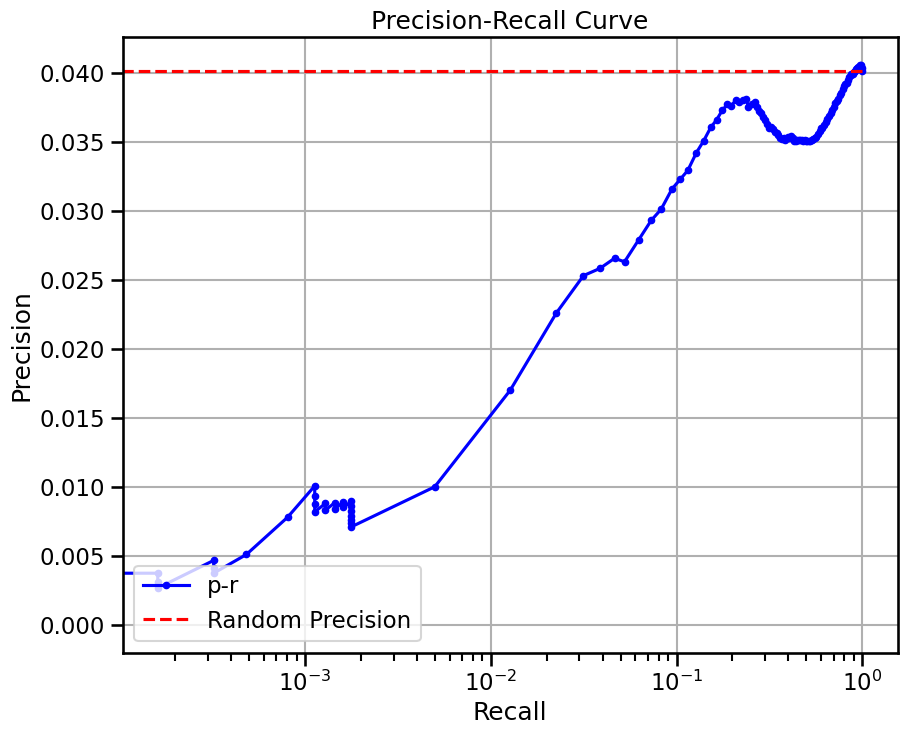

In [39]:
grn.varp['GRN'] = grn.varp['all'].mean(-1).T
metrics['scprint_mean_tran_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.20101723344966588 
recall:  1.0 
random precision: 0.20105748519845437



  0%|          | 0/128 [00:00<?, ?it/s]


 58%|█████▊    | 74/128 [00:00<00:00, 737.02it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 736.00it/s]

Area Under Precision-Recall Curve (AUPRC):  0.1996957091858347
EPR: 1.0095752486082952


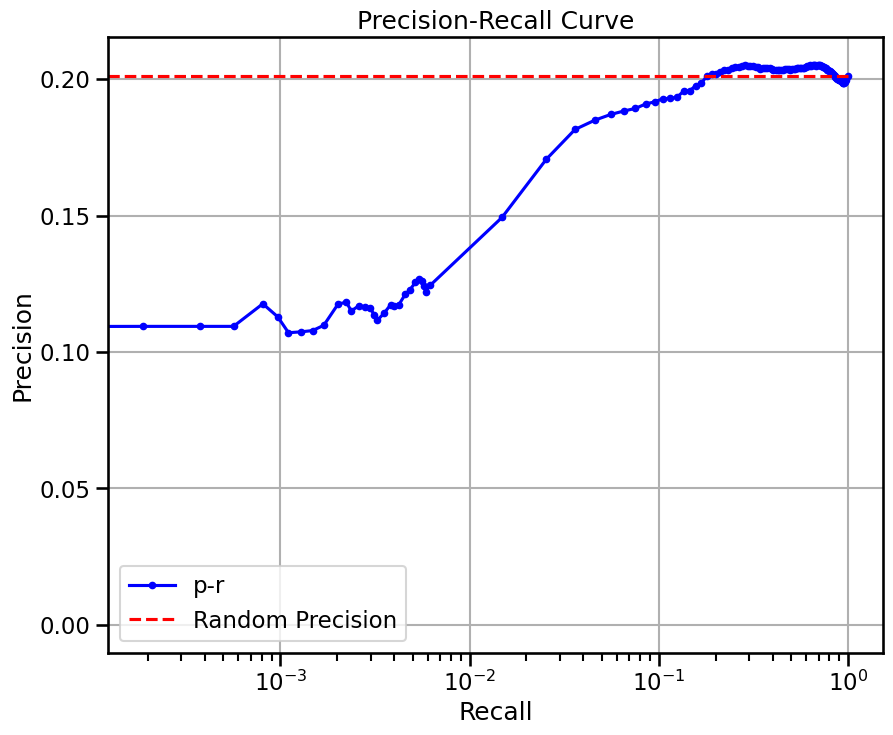

In [40]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="chip")
metrics['scprint_mean_tran_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.0857875419278928 
recall:  1.0 
random precision: 0.08580472005002494



  0%|          | 0/128 [00:00<?, ?it/s]


 35%|███▌      | 45/128 [00:00<00:00, 444.13it/s]


 70%|███████   | 90/128 [00:00<00:00, 443.72it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 442.22it/s]

Area Under Precision-Recall Curve (AUPRC):  0.08276437049210521
EPR: 1.0230452375979646


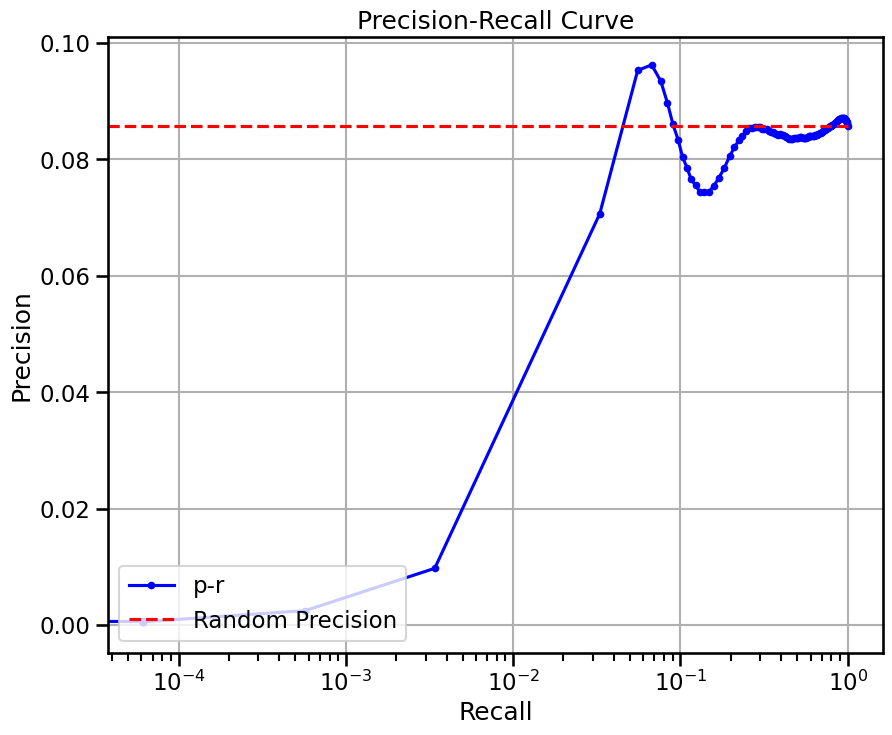

In [41]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="ko")
metrics['scprint_mean_tran_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [42]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="full")

precision:  0.04014336917562724 
recall:  1.0 
random precision: 0.04015140749544615



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2280.01it/s]

Area Under Precision-Recall Curve (AUPRC):  0.04631482260919283
EPR: 0.6960356299251258


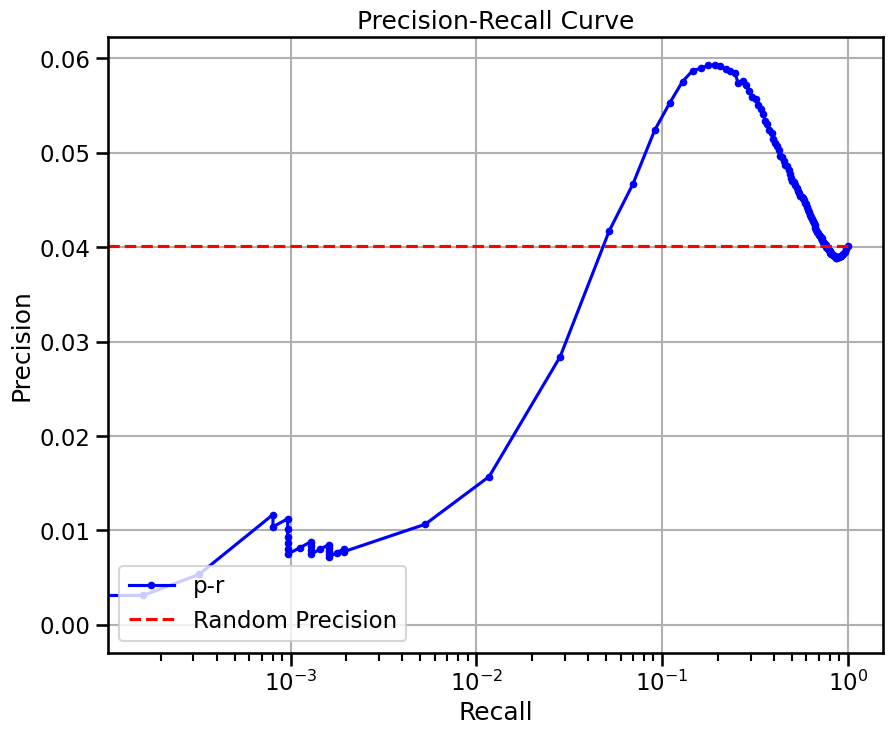

In [43]:
grn.varp["GRN"] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1).T
metrics['scprint_omni_tran_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.20101723344966588 
recall:  1.0 
random precision: 0.20105748519845437



  0%|          | 0/128 [00:00<?, ?it/s]


 58%|█████▊    | 74/128 [00:00<00:00, 739.67it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 737.42it/s]

Area Under Precision-Recall Curve (AUPRC):  0.19963987278245893
EPR: 1.0108419375014308


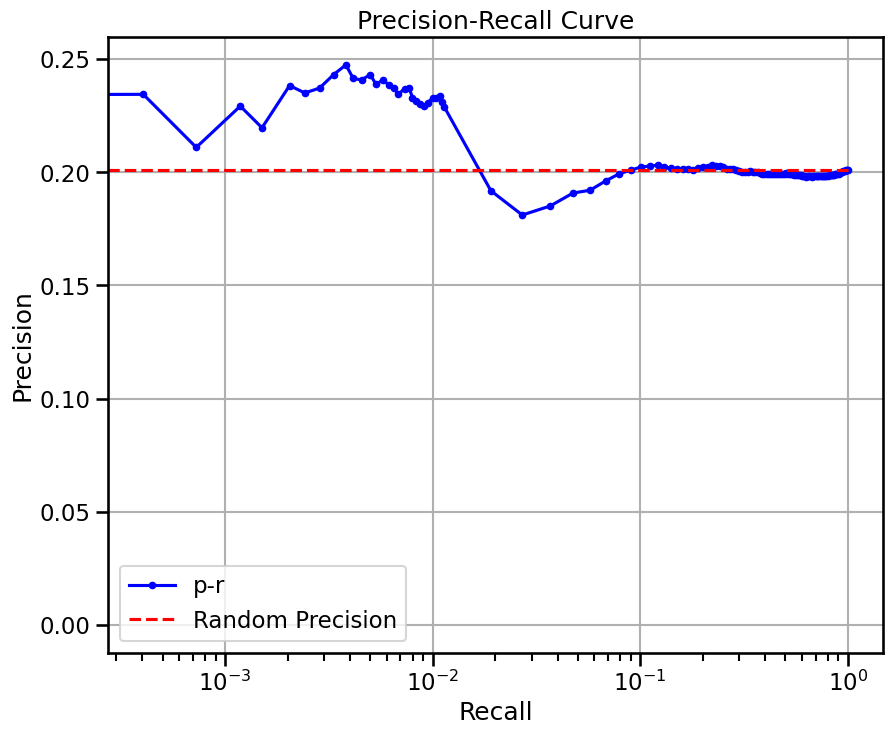

In [44]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="chip")
metrics['scprint_omni_tran_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.0857875419278928 
recall:  1.0 
random precision: 0.08580472005002494



  0%|          | 0/128 [00:00<?, ?it/s]


 35%|███▌      | 45/128 [00:00<00:00, 444.84it/s]


 70%|███████   | 90/128 [00:00<00:00, 443.79it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 443.20it/s]

Area Under Precision-Recall Curve (AUPRC):  0.09194528687315408
EPR: 1.2885314786641118


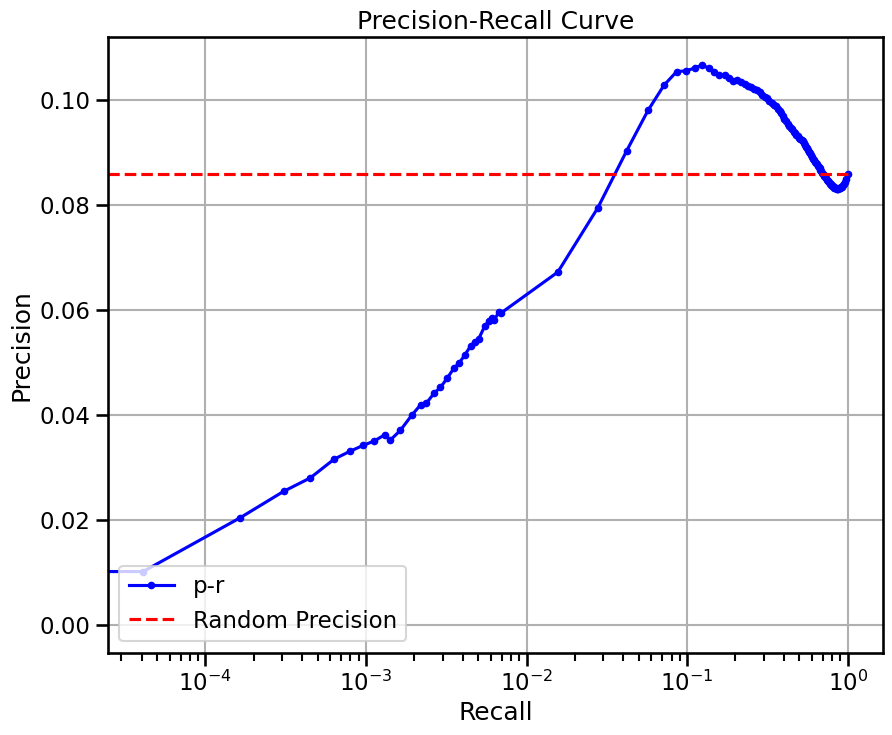

In [45]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="ko")
metrics['scprint_omni_tran_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.04014336917562724 
recall:  1.0 
random precision: 0.04015140749544615



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2262.37it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0408367931905954
EPR: 0.10038301500786308


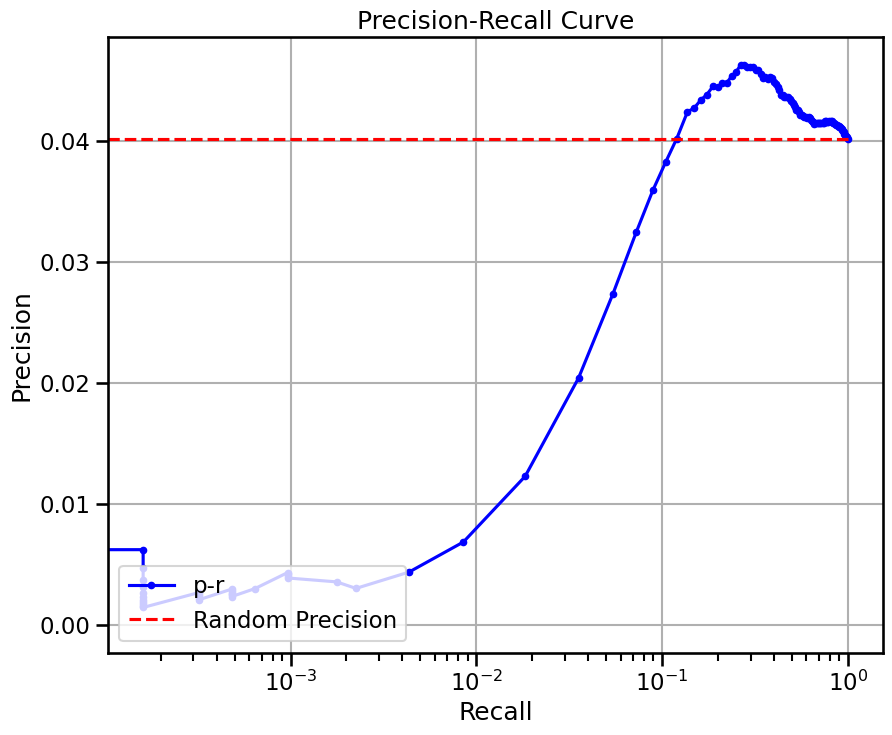

In [46]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="full")
grn.varp["GRN"] = grn.varp['all'][:,:,clf_self.coef_[0] > 0].mean(-1).T
metrics['scprint_self_tran_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.20101723344966588 
recall:  1.0 
random precision: 0.20105748519845437



  0%|          | 0/128 [00:00<?, ?it/s]


 57%|█████▋    | 73/128 [00:00<00:00, 722.78it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 720.03it/s]

Area Under Precision-Recall Curve (AUPRC):  0.19227588515927327
EPR: 0.8982850439440639


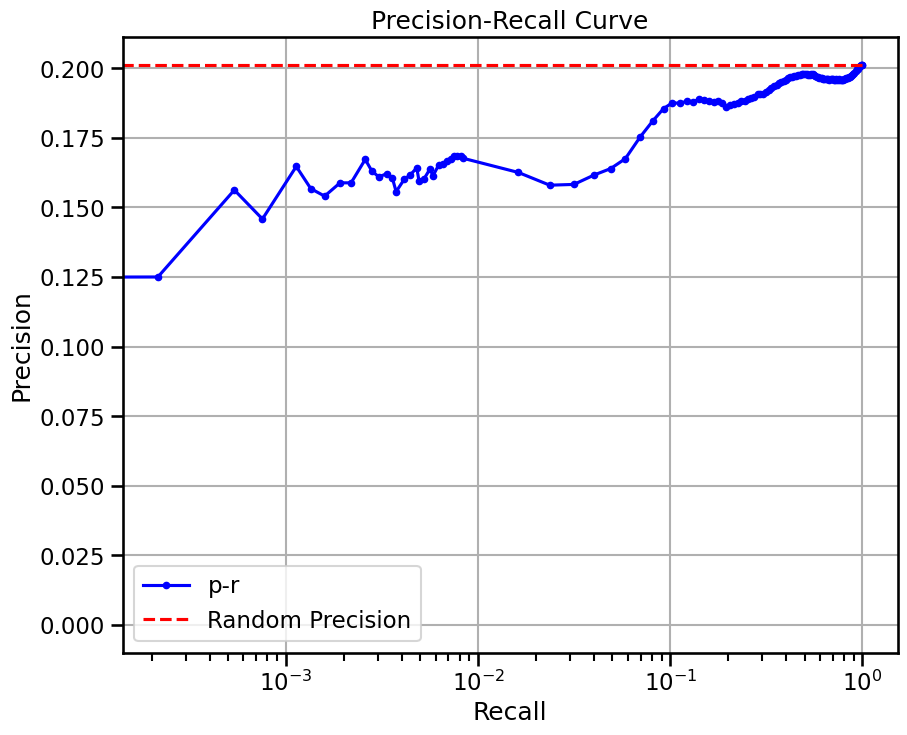

In [47]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="chip")
metrics['scprint_self_tran_chip'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.0857875419278928 
recall:  1.0 
random precision: 0.08580472005002494



  0%|          | 0/128 [00:00<?, ?it/s]


 35%|███▌      | 45/128 [00:00<00:00, 440.55it/s]


 70%|███████   | 90/128 [00:00<00:00, 438.16it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 436.92it/s]

Area Under Precision-Recall Curve (AUPRC):  0.09528731735813878
EPR: 1.1574777619596766


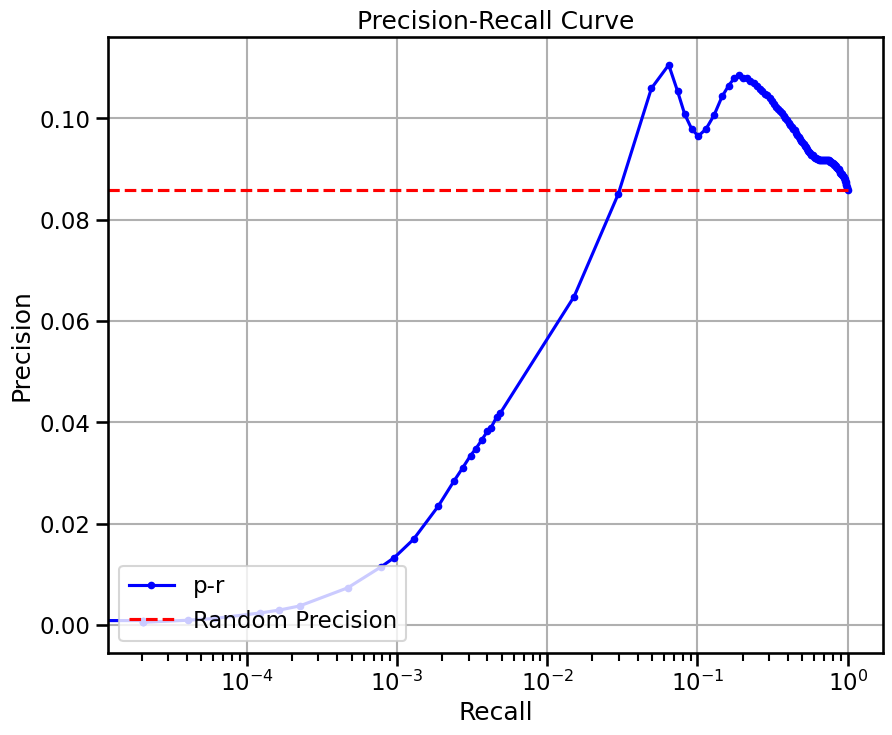

In [48]:
preadata = get_sroy_gt(get="tran", species="mouse", gt="ko")
metrics['scprint_self_tran_ko'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [49]:
del grn

## zhao / mouse

In [50]:
preadata = get_sroy_gt(get="zhao", species="mouse", gt="full")
adata = preprocessor(preadata.copy())
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
preadata, (preadata.grn.sum(1) != 0).sum()

Dropping layers:  KeysView(Layers with keys: )
checking raw counts


removed 0 non primary cells, 36199 renamining


filtered out 0 cells, 36199 renamining


Removed 0 genes.


startin QC


Seeing 828 outliers (2.29% of total dataset):


done


(GRnnData object with n_obs × n_vars = 36199 × 8442
     obs: 'organism_ontology_term_id'
     varp: 'GRN'
     with a grn of 9019 elements,
 34)

In [51]:
grn_inferer = GRNfer(model, adata,
                     how="most var within",
                     genes=adata.var[adata.var.symbol.isin(preadata.var[preadata.grn.sum(1) != 0].index.tolist())].index.tolist(),
                     preprocess="softmax",
                     head_agg='none',
                     filtration="none",
                     forward_mode="none",
                     apc=False,
                     symmetrize=False,
                     num_genes=MAXGENES,
                     max_cells=MAXCELLS,
                     doplot=False,
                     batch_size=32,
                     )
grn = grn_inferer(layer=list(range(model.nlayers))[:])

number of expressed genes in this cell type: 8220



  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [00:04<02:06,  4.09s/it]


  6%|▋         | 2/32 [00:07<01:58,  3.94s/it]


  9%|▉         | 3/32 [00:10<01:36,  3.31s/it]


 12%|█▎        | 4/32 [00:12<01:23,  3.00s/it]


 16%|█▌        | 5/32 [00:15<01:15,  2.81s/it]


 19%|█▉        | 6/32 [00:17<01:09,  2.69s/it]


 22%|██▏       | 7/32 [00:20<01:05,  2.61s/it]


 25%|██▌       | 8/32 [00:22<01:01,  2.55s/it]


 28%|██▊       | 9/32 [00:25<00:58,  2.53s/it]


 31%|███▏      | 10/32 [00:27<00:54,  2.47s/it]


 34%|███▍      | 11/32 [00:29<00:50,  2.42s/it]


 38%|███▊      | 12/32 [00:32<00:47,  2.39s/it]


 41%|████      | 13/32 [00:34<00:44,  2.37s/it]


 44%|████▍     | 14/32 [00:36<00:42,  2.35s/it]


 47%|████▋     | 15/32 [00:39<00:39,  2.34s/it]


 50%|█████     | 16/32 [00:41<00:37,  2.34s/it]


 53%|█████▎    | 17/32 [00:43<00:34,  2.33s/it]


 56%|█████▋    | 18/32 [00:46<00:32,  2.31s/it]


 59%|█████▉    | 19/32 [00:48<00:30,  2.32s/it]


 62%|██████▎   | 20/32 [00:50<00:27,  2.33s/it]


 66%|██████▌   | 21/32 [00:53<00:25,  2.33s/it]


 69%|██████▉   | 22/32 [00:55<00:23,  2.33s/it]


 72%|███████▏  | 23/32 [00:57<00:20,  2.33s/it]


 75%|███████▌  | 24/32 [01:00<00:18,  2.33s/it]


 78%|███████▊  | 25/32 [01:02<00:16,  2.32s/it]


 81%|████████▏ | 26/32 [01:04<00:13,  2.32s/it]


 84%|████████▍ | 27/32 [01:07<00:11,  2.32s/it]


 88%|████████▊ | 28/32 [01:09<00:09,  2.32s/it]


 91%|█████████ | 29/32 [01:11<00:06,  2.30s/it]


 94%|█████████▍| 30/32 [01:13<00:04,  2.24s/it]


 97%|█████████▋| 31/32 [01:16<00:02,  2.25s/it]


100%|██████████| 32/32 [01:18<00:00,  2.27s/it]


100%|██████████| 32/32 [01:18<00:00,  2.46s/it]

In [52]:
grn.varp["all"] = grn.varp['GRN']
grn.var['ensembl_id'] = grn.var.index
grn.var['symbol'] = make_index_unique(grn.var['symbol'].astype(str))
grn.var.index = grn.var['symbol']

precision:  0.0392254862760778 
recall:  1.0 
random precision: 0.03923332980462731



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2090.99it/s]

Area Under Precision-Recall Curve (AUPRC):  0.037638240371443685
EPR: 0.03177642392304454


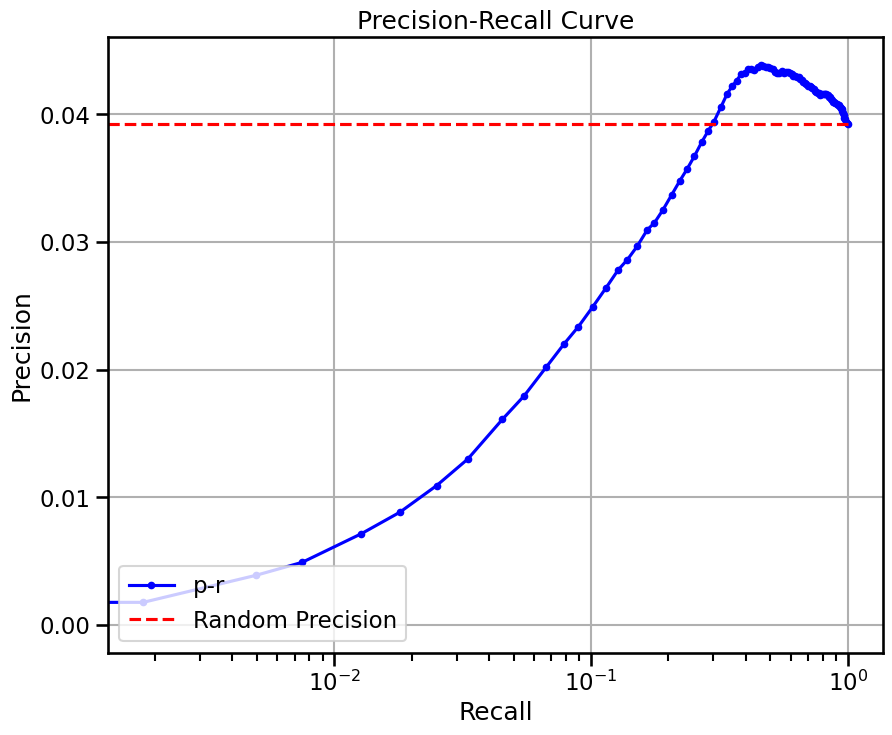

In [53]:
grn.varp['GRN'] = grn.varp['all'].mean(-1).T
metrics['scprint_mean_zhao_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.0392254862760778 
recall:  1.0 
random precision: 0.03923332980462731



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2101.40it/s]

Area Under Precision-Recall Curve (AUPRC):  0.03960312854229586
EPR: 0.4726861197701824


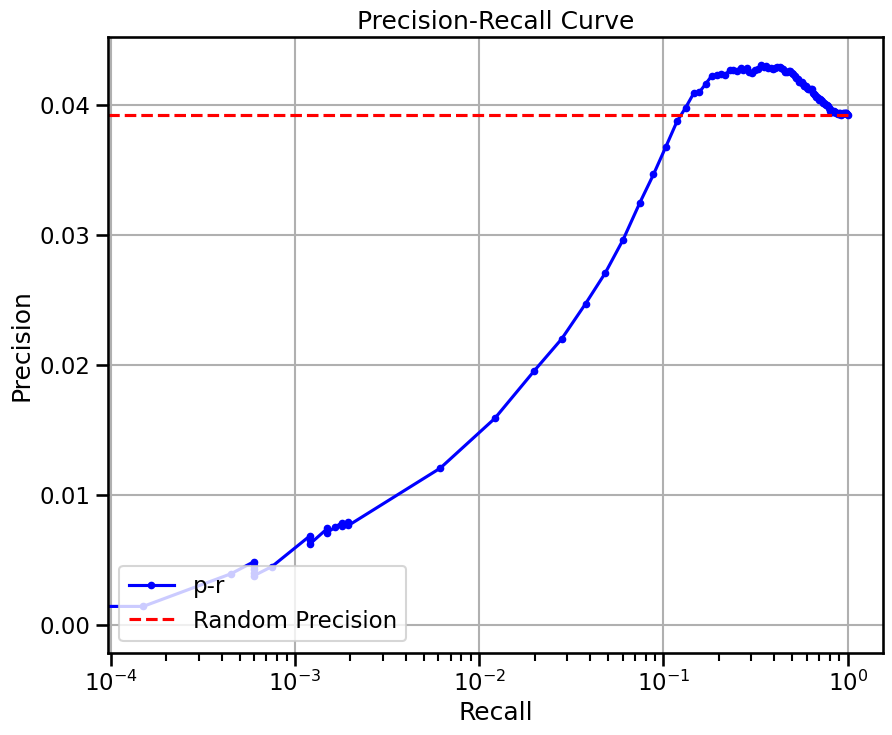

In [54]:
grn.varp["GRN"] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1).T
metrics['scprint_omni_zhao_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

precision:  0.0392254862760778 
recall:  1.0 
random precision: 0.03923332980462731



  0%|          | 0/128 [00:00<?, ?it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:755: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:00<00:00, 2089.08it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0371784225601556
EPR: 0.0


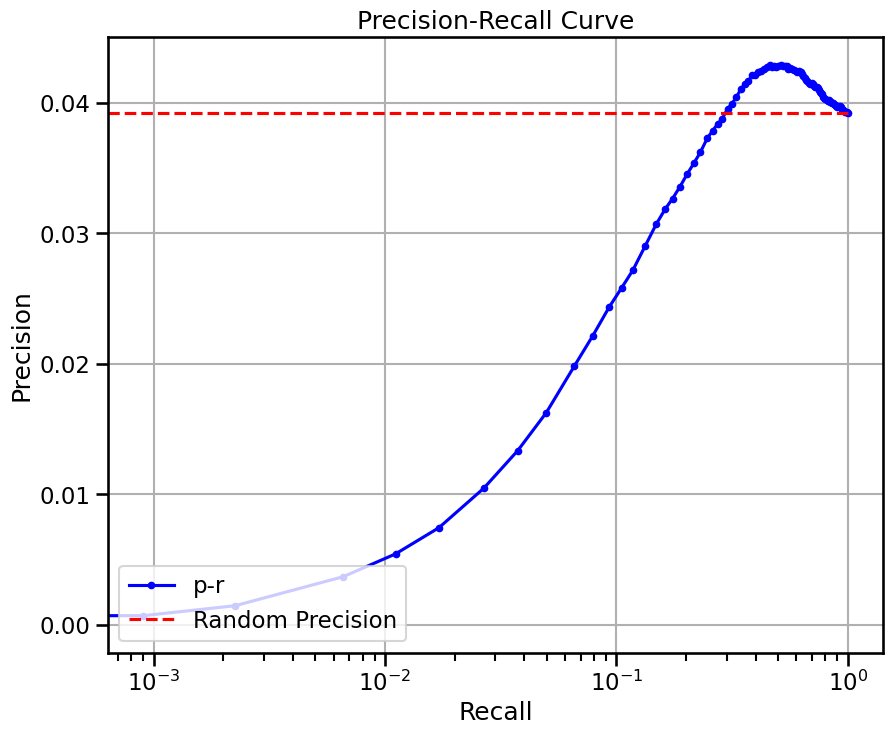

In [55]:
grn.varp["GRN"] = grn.varp['all'][:,:,clf_self.coef_[0] > 0].mean(-1).T
metrics['scprint_self_zhao_full'] = BenGRN(grn, do_auc=True, doplot=True).compare_to(other=preadata)

In [56]:
metrics

{'scprint_mean_han_full': {'precision': 0.038948387096774194,
  'recall': 1.0,
  'rand_precision': 0.03895617833244068,
  'auprc': 0.06843434798328386,
  'epr': 3.0202397291167022},
 'scprint_mean_han_base': {'TF_enr': True,
  'significant_enriched_TFtargets': 16.363636363636363,
  'precision': 0.0016151890916386552,
  'recall': 1.0,
  'rand_precision': 0.001615617978811156,
  'auprc': 0.0017760927811393593,
  'epr': 2.5238206124897586},
 'scprint_mean_han_chip': {'precision': 0.264192,
  'recall': 1.0,
  'rand_precision': 0.26424484896979394,
  'auprc': 0.28839491920674104,
  'epr': 1.1085181981375822},
 'scprint_mean_han_ko': {'precision': 0.08270819672131148,
  'recall': 1.0,
  'rand_precision': 0.0827247416696454,
  'auprc': 0.09725005285864109,
  'epr': 2.014218752208892},
 'scprint_omni_han_full': {'precision': 0.038948387096774194,
  'recall': 1.0,
  'rand_precision': 0.03895617833244068,
  'auprc': 0.05200130779678841,
  'epr': 1.7114910163771409},
 'scprint_omni_han_base': {'T

In [57]:
import pandas as pd

In [58]:
res = []
res2 = []
for k, v in metrics.items():
    if k.split('_')[-1] == "base":
        res2.append(["_".join(k.split('_')[-3:-1]), v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])
    elif k.split('_')[-1] == "ko":
        res.append(["_".join(k.split('_')[-3:-2])+"_ko", v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])
    elif k.split('_')[-1] == "chip":
        res.append(["_".join(k.split('_')[-3:-2])+"_chip", v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])
    else:
        res.append(["_".join(k.split('_')[-3:-1]), v['epr'], v['auprc'], v['rand_precision'], 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_only'])
df2 = pd.DataFrame(res2, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_only
0,mean_han,3.020240,0.068434,0.038956,False
1,mean_chip,1.108518,0.288395,0.264245,False
2,mean_ko,2.014219,0.097250,0.082725,False
3,omni_han,1.711491,0.052001,0.038956,False
4,omni_chip,0.693088,0.222104,0.264245,False
5,omni_ko,2.288507,0.114919,0.082725,False
6,self_han,3.280665,0.166738,0.082725,False
7,self_chip,1.012567,0.271100,0.264245,False
8,self_ko,3.280665,0.166738,0.082725,False
9,mean_mine,0.034632,0.022676,0.026917,False


In [59]:
df2

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,mean_han,2.523821,0.001776,0.001616,16.363636,True,False
1,omni_han,2.387085,0.002076,0.001616,20.000000,True,False
2,self_han,2.523821,0.001786,0.001616,14.545455,True,False
3,mean_mine,1.003192,0.001820,0.001612,15.555556,False,False
4,omni_mine,2.592827,0.001916,0.001612,31.111111,False,False
5,self_mine,2.689690,0.001819,0.001612,13.333333,False,False
